In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [2]:
# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/car+evaluation/car.data'
df = pd.read_csv(file_name)
print(df)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]


In [3]:
# 수치에 맞는 컬럼명 지정하기

column_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety','Class']
raw_dataset = pd.read_csv(file_name, names=column_names, na_values ="?", comment='\t',
                         sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data = dataset

In [5]:
data

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
Class       0
dtype: int64

In [8]:
data.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class'], dtype='object')

In [71]:
#train, test set 분류하기

X = data
X = X.drop(columns=['Class'], axis=1)
y = data['Class']

In [72]:
from sklearn.preprocessing import LabelEncoder
# one - hot
le=LabelEncoder()
for i in data.columns:

    data[i]=le.fit_transform(data[i])
    
y1 = le.fit_transform(y)
Y = pd.get_dummies(y).values

print(data)

      Buying  Maint  Doors  Persons  Lug_boot  Safety  Class
0          3      3      0        0         2       1      2
1          3      3      0        0         2       2      2
2          3      3      0        0         2       0      2
3          3      3      0        0         1       1      2
4          3      3      0        0         1       2      2
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3

[1728 rows x 7 columns]


In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [74]:
X

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [75]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [76]:
data['Class'].value_counts()

2    1210
0     384
1      69
3      65
Name: Class, dtype: int64

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# Dense층은 6개, 출력은 4개로 모델 구성

model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 6)                 42        
                                                                 
 dense_41 (Dense)            (None, 6)                 42        
                                                                 
 dense_42 (Dense)            (None, 6)                 42        
                                                                 
 dense_43 (Dense)            (None, 4)                 28        
                                                                 
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [78]:
# Epochs 100번으로 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 0.9144 - accuracy: 0.6541 - val_loss: 0.7894 - val_accuracy: 0.6936
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7487 - accuracy: 0.7019 - val_loss: 0.7188 - val_accuracy: 0.6936
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6997 - val_loss: 0.6788 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7019 - val_loss: 0.6535 - val_accuracy: 0.6965
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.7048 - val_loss: 0.6746 - val_accuracy: 0.6705
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7258 - val_loss: 0.6266 - val_accuracy: 0.7139
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7417 - val_loss: 0.5854 - val_accuracy: 0.7601
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.9052 - val_loss: 0.2573 - val_accuracy: 0.8960
Epoch 60/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9038 - val_loss: 0.2788 - val_accuracy: 0.8902
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9074 - val_loss: 0.2872 - val_accuracy: 0.8526
Epoch 62/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8763 - val_loss: 0.2811 - val_accuracy: 0.8873
Epoch 63/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.9009 - val_loss: 0.2553 - val_accuracy: 0.8988
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8980 - val_loss: 0.2467 - val_accuracy: 0.9046
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9030 - val_loss: 0.2910 - val_accuracy: 0.8873
Epoch 

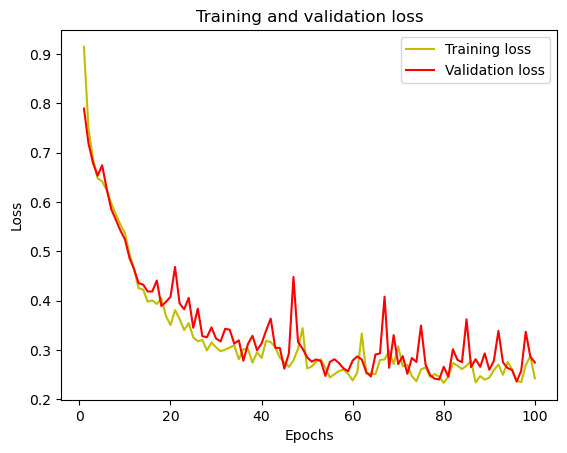

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

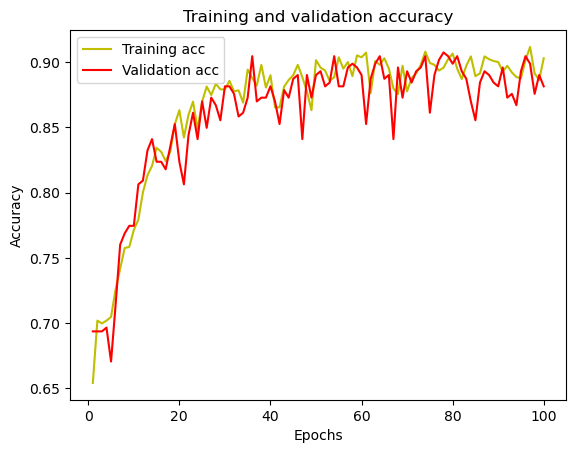

In [80]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
# 정확도(predicted)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74        79
           1       0.00      0.00      0.00        17
           2       0.96      0.90      0.93       240
           3       0.77      1.00      0.87        10

    accuracy                           0.85       346
   macro avg       0.59      0.70      0.63       346
weighted avg       0.84      0.85      0.84       346

[[ 70   0   8   1]
 [ 15   0   0   2]
 [ 25   0 215   0]
 [  0   0   0  10]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
